# Check the data left after downsampling

In [1]:
from typing import Tuple

import seaborn as sns
import matplotlib.pyplot as plt

from param import *
from modules.dataloader import UniformSegmentDataset, BaseDataset
from modules.utils.util import segment

data_list = ParamDir().data_list

Text(0.5, 0, 'permutation test')

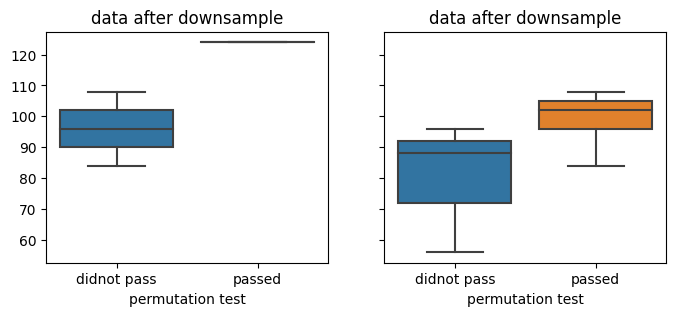

In [2]:
fig, axes = plt.subplots(figsize=(8,3), ncols=2, sharey=True)

KO_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" in  str(data_dir).split('/')[-1]]

data_amout_all = []
for i, data_dir in enumerate(KO_data_list):
    segment_len = []
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(ParamData().window_size, ParamData().K, ParamData().train_ratio)

    data_amout_all.append([len(X_train), data_name])
    
pass_res_KO = []
not_pass_res_KO = []
for item in data_amout_all:
    if item[1] in ["091317 OF CaMKII HKO M19-n1"]:
        pass_res_KO.append([np.mean(item[0]), item[1]])
    else:
        not_pass_res_KO.append([np.mean(item[0]), item[1]])
sns.boxplot([[i[0] for i in not_pass_res_KO], [i[0] for i in pass_res_KO]], ax=axes[0])
axes[0].set_title("data after downsample")
axes[0].set_xticklabels(["didnot pass", "passed"])
axes[0].set_xlabel("permutation test")


WT_names = ["M45_042718_OF", "M46_042718_OF", "092217 OF CaMKII WT M29-n1"]
WT_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" not in  str(data_dir).split('/')[-1]]

data_amout_all = []
for i, data_dir in enumerate(WT_data_list):
    segment_len = []
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(ParamData().window_size, ParamData().K, ParamData().train_ratio)

    data_amout_all.append([len(X_train), data_name])
    

pass_res_WT = []
not_pass_res_WT = []
for item in data_amout_all:
    if item[1] not in  WT_names:
        pass_res_WT.append([np.mean(item[0]), item[1]])
    else:
        not_pass_res_WT.append([np.mean(item[0]), item[1]])
sns.boxplot([[i[0] for i in not_pass_res_WT], [i[0] for i in pass_res_WT]], ax=axes[1])
axes[1].set_title("data after downsample")
axes[1].set_xticklabels(["didnot pass", "passed"])
axes[1].set_xlabel("permutation test")



In [3]:
print(f"passed: \n {pass_res_KO} \ndidnot pass: \n {not_pass_res_KO}")

passed: 
 [[124.0, '091317 OF CaMKII HKO M19-n1']] 
didnot pass: 
 [[108.0, '092217 OF CaMKII HKO M30-n1'], [92.0, '091317 OF CaMKII HKO M20-n1'], [100.0, 'CK_KO_RN1_OF'], [84.0, '090817 OF CaMKII HKO M22-n1']]


In [4]:
print(f"passed: \n {pass_res_WT} \ndidnot pass: \n {not_pass_res_WT}")

passed: 
 [[104.0, 'CK_WT_RN3_OF'], [108.0, 'M44_042718_OF'], [84.0, '092717 OF SERT WT M32-n1'], [100.0, '081117 OF B6J M27-n1']] 
didnot pass: 
 [[56.0, 'M45_042718_OF'], [96.0, 'M46_042718_OF'], [88.0, '092217 OF CaMKII WT M29-n1']]
